In [1]:
from astroML.datasets import fetch_dr7_quasar

# Fetch the quasar data
data = fetch_dr7_quasar()

# select the first 10000 points
data = data[:10000]

z = data['redshift']

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


downloading DR7 quasar dataset from http://das.sdss.org/va/qsocat/dr7qso.dat.gz to C:\Users\Dell\astroML_data
[=========================================]  12.82Mb / 12.82Mb   


In [11]:
import pylab as plt

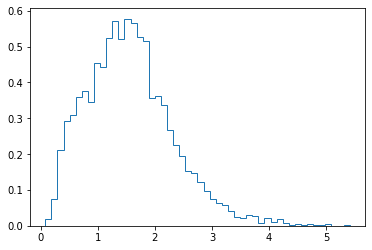

In [20]:
plt.hist(z, bins = 50, histtype = 'step', density = True)
plt.show()

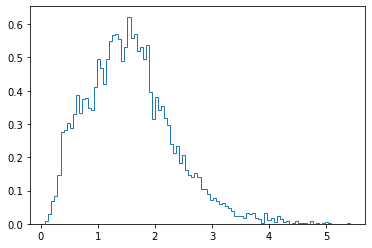

18.750117890840645

In [59]:
import numpy as np
NBIN = 100
plt.hist(z, bins = NBIN, histtype = 'step', density = True)
plt.show()
a, b = np.histogram(z, bins=NBIN, density = True)
np.sum(a)

### Cloning by inverse transform

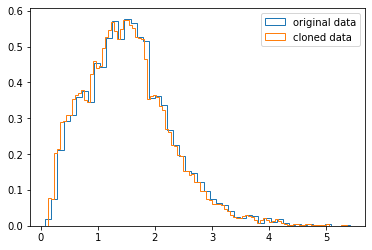

In [64]:
import scipy
plt.hist(z,bins=50,histtype='step',density=True,label='original data')
counts, bins = np.histogram(z, bins=50, density=True)

bin_mids = (bins[1:] + bins[:-1]) / 2 # mid location of bins
simple_cdf = np.cumsum(counts) / np.sum(counts) # very simply cumulative sum

# set up an interpolation of the inverse cumulative distribution
tck = scipy.interpolate.interp1d(simple_cdf, bin_mids)
u = np.random.uniform(min(simple_cdf),max(simple_cdf), 1000000) 
x_sample = tck(u)

plt.hist(x_sample, bins=100, density=True, histtype='step',label='cloned data');

plt.legend();

### Cloning by rejection sempling

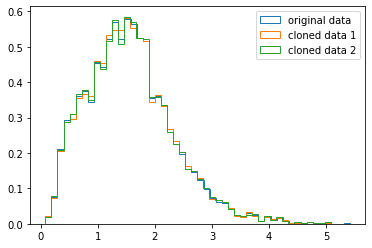

In [46]:
maxh = counts.max() # find the maximum
plt.hist(z,bins=50,histtype='step',density=True,label='original data');

# make a simple histogram object
counts, bins = np.histogram(z, bins=50, density=True)
maxh = counts.max() # find the maximum

# Make a scipy.stats random variable object from a histogram
# This is a great hack!
disth = scipy.stats.rv_histogram((counts,bins))
# Let's do it manually again
N = 100000 # trials
q = np.random.uniform(0, 6, N) # proposed points
u = np.random.uniform(0, maxh, N) # uniform draws

mask = u<=disth.pdf(q) # assess whether u <= q(x_i)

monte_carlo = q[mask] # reject all points that don't pass, using masking

plt.hist(monte_carlo, bins=50, density=True,histtype='step',label='cloned data 1');

### But scipy has it already implemented 
plt.hist(disth.rvs(size=N),bins=50,density=True,histtype='step',label='cloned data 2');

plt.legend();